## Rough surfaces and statistics

According to our internship topic, we will finally develop a solver that can solve the evaluation of the contact between two rough viscoelastic surfaces. Now, in this week, we want to manage an algorithm that can generate rough surfaces. Let's still base on the first chapiter of Lucas(2020)[1].

First, we cite a figure from CMET course of Yastrebov[4] to clearify our work direction.

![Roughness_classification_according_to_Nayak](figures/Roughness_classification_according_to_Nayak.png)

$$
\phi(\boldsymbol{q}):=|\mathcal{F}[h](\boldsymbol{q})|^2
$$



$$
\phi(\boldsymbol{q})= \begin{cases}C & q_l \leq q<q_r, \\ C\left(\frac{q}{q_r}\right)^{-2(H+1)} & q_r \leq q<q_s, \\ 0 & \text { otherwise, }\end{cases}
$$

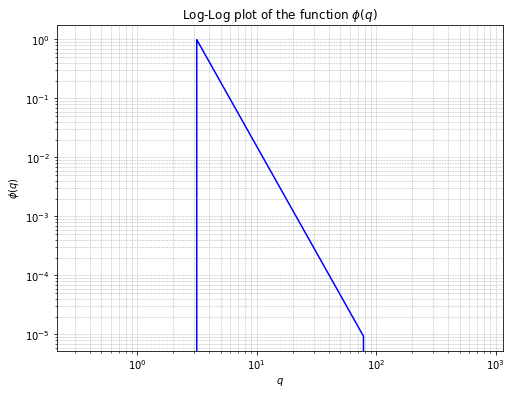

In [3]:
import numpy as np
import matplotlib.pyplot as plt

L = 2

# Constants for the piecewise function
C = 1 # Just as an example, C can be any constant
q_l = 2*np.pi/L
q_r = 2*np.pi/L
q_s = 2*np.pi*25/L
H = 0.8 # Hurst exponent, just as an example

# Defining the piecewise function
def phi(q):
    if q_l <= q < q_r:
        return C
    elif q_r <= q < q_s:
        return C * (q / q_r) ** (-2 * (H + 1))
    else:
        return 0

# Generating a range of q values for the plot
q_values = q_values = np.logspace(np.log10(q_l/10), np.log10(q_s*10), 500)
phi_values = np.array([phi(q) for q in q_values])

# Creating the plot
plt.figure(figsize=(8, 6))
plt.loglog(q_values, phi_values, label=r'$\phi(q)$', color='blue')

# Adding titles and labels
plt.title('Log-Log plot of the function $\\phi(q)$')
plt.xlabel('$q$')
plt.ylabel('$\\phi(q)$')

# Adding a grid
plt.grid(which='both', linestyle='--', linewidth=0.5)

# Show the plot
plt.show()


### Algorithm 1: Filtering algorithm (Hu and Tonder, 1992)

This method is based on digital signal processing techniques. **The core idea is to use a filter to modify the spectral content of a surface profile, thereby generating roughness characteristics that resemble those of a real surface.** It often involves starting with a base surface and then applying a series of filters to introduce or amplify certain features, mimicking the statistical properties of roughness observed in real-world surfaces.



**Inputs:** surface sizes $ \widehat{N} := (N_1, N_2) $, PSD $ \phi : \mathbb{R}^2 \rightarrow \mathbb{R} $.

1. Initialize $ \mathbf{X} $ as a Gaussian uncorrelated vector:
   $$ \mathbf{X} \sim \mathcal{N}(0, I) $$
2. Define $ \mathbf{S} $ with the discrete PSD for each $ \mathbf{k} $ in $ \mathbb{Z}^2_{\widehat{N}} $:
   $$ \mathbf{S} \leftarrow \phi(\mathbf{k}) $$
3. Compute the Fourier transform of $ \mathbf{X} $:
   $$ \mathbf{\hat{H}} \leftarrow \text{FFT}[\mathbf{X}] $$
4. Perform a point-wise product and take the square root:
   $$ \mathbf{\hat{H}} \leftarrow \mathbf{\hat{H}} \circ \sqrt{\mathbf{S}} $$
5. Obtain the discrete surface heights $ \mathbf{H} $ by inverse FFT:
   $$ \mathbf{H} \leftarrow \sqrt{|\widehat{N}|} \cdot \text{FFT}^{-1}[\mathbf{\hat{H}}] $$

**Output:** $ \mathbf{H} $ discrete surface heights.



In [ ]:


#We generate a 2D coordinate space
n = 30
m = 30

#we define the frequency with q_x and q_y
q_x = 2 * np.pi * np.fft.fftfreq(n, d=L/n)
q_y = 2 * np.pi * np.fft.fftfreq(m, d=L/m)
QX, QY = np.meshgrid(q_x, q_y)



### Algorithm 2: Random phase algorithm (Wu, 2000)

This approach focuses on generating surface topography by manipulating the phase information in the frequency domain. **The random phase algorithm constructs the surface by ensuring that the amplitude spectrum meets the desired roughness criteria, but with phases randomly distributed.** This randomness in phase ensures the surface exhibits the stochastic nature of real-world roughness, allowing for the generation of surfaces with specific statistical properties but without a predefined spatial pattern.


**Inputs:** surface sizes $ \widehat{N} := (N_1, N_2) $, PSD $ \phi : \mathbb{R}^2 \rightarrow \mathbb{R} $.

1. Initialize $ \mathbf{X} $ with uniformly distributed phases:
   $$ \mathbf{X} \leftarrow \mathcal{U}(-\pi, \pi) $$
2. Define $ \mathbf{S} $ with the discrete PSD for each $ \mathbf{k} $ in $ \mathbb{Z}^2_{\widehat{N}} $:
   $$ \mathbf{S} \leftarrow \phi(\mathbf{k}) $$
3. Compute the exponential of $ \mathbf{X} $ times $ i $ (the imaginary unit):
   $$ \mathbf{\hat{H}} \leftarrow \exp(\mathbf{X}i) $$
4. Perform a point-wise product and take the square root:
   $$ \mathbf{\hat{H}} \leftarrow \mathbf{\hat{H}} \circ \sqrt{\mathbf{S}} $$
5. Obtain the discrete surface heights $ \mathbf{H} $ by inverse FFT:
   $$ \mathbf{H} \leftarrow |\widehat{N}| \cdot \text{FFT}^{-1}[\mathbf{\hat{H}}] $$

**Output:** $ \mathbf{H} $ discrete surface heights.




Each of these algorithms has its advantages and applications, depending on the required level of detail, computational efficiency, and the specific characteristics of the rough surface to be modeled. The Filtering algorithm is particularly useful for applications where the roughness spectrum of the surface is well understood and needs to be replicated accurately. **On the other hand, the Random Phase algorithm is more suited for cases where the statistical properties of the surface are known, but the exact spatial arrangement of the roughness features is not critical, allowing for a more stochastic approach to surface generation.**



Reference:

[1] Frérot, Lucas Henri Galilée. ‘Bridging Scales in Wear Modeling with Volume Integral Methods for Elastic-Plastic Contact’, n.d.

[2] Hu, Y.Z. and Tonder, K., 1992. Simulation of 3-D random rough surface by 2-D digital filter and Fourier analysis. International journal of machine tools and manufacture, 32(1-2), pp.83-90. DOI: 10.1016/0890-6955(92)90064-N

[3] Nayak, J. Lub. Tech. (ASME) 93:398 (1971)

[4] Vladislav A. Yastrebov, Contact mechanics and elements of tribology, Lecture 4.b, Contact and transport at small scales, Open Course Contact Mechanics and Elements of Tribology, January 23, 2024, https://cmet.yastrebov.fr/index.html

[5] https://github.com/vyastreb/SelfAffineSurfaceGenerator